In [2]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# from p4_copy2 import render_pose_rays
from plenoxel_og_copy2 import render_rays

H = 420
W = 1260


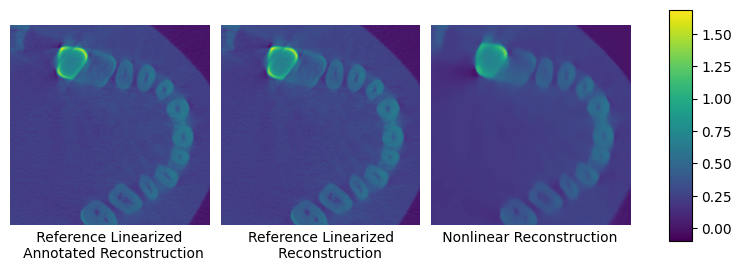

png PSNR: 16.52


In [14]:
# Generate nice figures

def separate_horizontally(img, linewidth=1):
    H, W = img.shape
    print(f'H = {H}')
    print(f'W = {W}')
    assert H * 3 == W
    newimg = np.ones((H, W + linewidth*2)) * np.nan
    newimg[:,:H] = img[:,:H]
    newimg[:,H+linewidth:2*H+linewidth] = img[:,H:2*H]
    newimg[:,2*H+2*linewidth:] = img[:,2*H:]
    return newimg

def resizing(image, factor):
    size = image.shape
    new_size = [int(s * factor) for s in size]
    max_val = np.max(image.flatten())
    pil_img = Image.fromarray(np.uint8(image* 255 / max_val) )
    pil_img = pil_img.resize(new_size)
    image = np.array(pil_img)*max_val/255
    offset = [(n-s)//2 for (n, s) in zip(new_size, size)]
    return image[offset[0]:offset[0]+size[0], offset[1]:offset[1]+size[1]]


def make_figure(offset):
    # Load the paths for the volumes and load them
    tiff_path = f'./jax_logs/spikeTiffTesting_radius7.5_res900_tv0.0003_lr0.002_nonneg_views720/epoch_0/sigma_grid.npy' # tiff Spike
    png_path = f'./jax_logs/PNGspikeTest_radius7.5_res900_tv0.0003_lr0.002_nonneg_views720/epoch_0/sigma_grid.npy'      # png Spike
    tiff_grid = np.load(tiff_path)
    png_grid = np.load(png_path)

    # Get the resolution for the grids cut them off to be 600*600
    resolution = 900 #900
    start= 150 #150
    stop = 750 #750

    tiff_grid = np.reshape(tiff_grid, order='C', newshape=(resolution, resolution, resolution))
    tiff_grid = tiff_grid[start:stop,start:stop,start:stop]

    png_grid = np.reshape(png_grid, order='C', newshape=(resolution, resolution, resolution))
    png_grid = png_grid[start:stop,start:stop,start:stop]


    reso = tiff_grid.shape[0]
    # Load the reference path for the volumes and load it
    gt_path = f'/home/fabriz/data/spike/Spike92_8_16_33_recoFull.tif'
    gt_grid = tifffile.imread(gt_path).T

    # Compute PSNRs with respect to the ground truth
    png_mse = np.mean(np.square(png_grid - gt_grid))
    tiff_mse = np.mean(np.square(tiff_grid - gt_grid))
    png_psnr = -10*np.log10(png_mse)
    tiff_psnr = -10*np.log10(tiff_mse)

    slice = int(3/8. * reso)+23+offset # got gt_grid 22 seemed okay for most but it chages depending on the value passed in
    # print(slice)
    x_start = 90
    x_stop = 510

    y_start = 150
    y_stop = 570

    gt_grid     = gt_grid[x_start-5:x_stop-5, y_start-80:y_stop-80]
    png_grid   = png_grid[x_start:x_stop,       y_start:y_stop]
    tiff_grid = tiff_grid[x_start:x_stop,       y_start:y_stop]

    # print(gt_grid.shape)
    # print(gt_grid[0].size)
    # print(gt_grid[1].size)
    # print(gt_grid[2].size)
    # print(round(gt_grid[0].size*0.75))

    gt_slice_offset = 26

    # zslice = np.concatenate([gt_grid[:,:,slice+26], png_grid[:,:,slice], tiff_grid[:,:,slice]], axis=1)
    # zslice = np.concatenate(  [gt_grid[:,:,slice+26], png_grid[:,:,slice], zoomed_gt_grid[:,:,slice-100]], axis=1)
    zslice = np.concatenate([gt_grid[:,:,slice+gt_slice_offset], gt_grid[:,:,slice+gt_slice_offset], resizing(png_grid[:,:,slice], 1.05)], axis=1)

    allslices = separate_horizontally(zslice, linewidth=20)
    plt.figure(figsize=(10,3))
    plt.imshow(allslices, cmap='viridis')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(aspect=10)
    plt.xlabel(f'      Reference Linearized               Reference Linearized           Nonlinear Reconstruction \n   Annotated Reconstruction                 Reconstruction', loc = "left")
    plt.box(False)
    plt.show()
    print(f'png PSNR: {png_psnr:.2f}')
# make_figure(80)
# make_figure(-80)
# make_figure(-60)
# make_figure(-40)
# make_figure(-20)
# make_figure(0)
# make_figure(20)
# make_figure(40)
# make_figure(60)
# make_figure(75)
# make_figure(78)
make_figure(80)
# make_figure(83)
# make_figure(85)